In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from tqdm.notebook import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [17]:
import os
import pandas as pd
from tqdm import tqdm

# Assuming your main dataset folder is named 'dataset' and it contains 'Final_Dataset_India' folder
# main_dataset_path = '/kaggle/input/dataset/Final_Dataset_India'

anemiapath = os.path.join("C:/Users/asus/Documents/palm_data/Anaemic")
nonanemiapath = os.path.join("C:/Users/asus/Documents/palm_data/Non_Anaemic")

anemia_image_paths = [os.path.join(anemiapath, filename) for filename in tqdm(os.listdir(anemiapath))]
anemia_labels = [1] * len(anemia_image_paths)

non_anemia_image_paths = [os.path.join(nonanemiapath, filename) for filename in tqdm(os.listdir(nonanemiapath))]
non_anemia_labels = [0] * len(non_anemia_image_paths)

image_paths = anemia_image_paths + non_anemia_image_paths
labels = anemia_labels + non_anemia_labels

df = pd.DataFrame({"Image": image_paths, "Label": labels})


  0%|          | 0/1698 [00:00<?, ?it/s]

100%|██████████| 1698/1698 [00:00<00:00, 340452.61it/s]


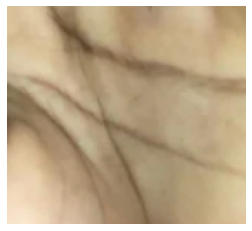

In [18]:
img = Image.open(df['Image'][1])
plt.axis('off')
plt.imshow(img);

In [19]:
x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)

In [20]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((224,224), Image.LANCZOS)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),224,224,3)
    return features

In [21]:
x= extract_features(x_train['Image'])
#normalization on the pixel values of the images
x = x/255.0
y = np.array(x_train['Label'])

100%|██████████| 3408/3408 [00:10<00:00, 313.09it/s]


In [22]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(pool_size =(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size =(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size =(2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size =(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
#Training the model
history = model.fit(x=x, y=y,batch_size = 32,epochs = 40, validation_split = 0.2)

Epoch 1/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5630 - loss: 0.7426 - val_accuracy: 0.5836 - val_loss: 0.6545
Epoch 2/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.5975 - loss: 0.6627 - val_accuracy: 0.5836 - val_loss: 0.7211
Epoch 3/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.5993 - loss: 0.6591 - val_accuracy: 0.5968 - val_loss: 0.6684
Epoch 4/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.5752 - loss: 0.6664 - val_accuracy: 0.5836 - val_loss: 0.6591
Epoch 5/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 86s 996ms/step - accuracy: 0.6035 - loss: 0.6707 - val_accuracy: 0.4736 - val_loss: 0.6945
Epoch 6/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 86s 998ms/step - accuracy: 0.5771 - loss: 0.6703 - val_accuracy: 0.5836 - val_loss: 0.6559
Epoch 7/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.5985 - loss: 0.6662 - val_accuracy: 0.5836 - val_loss: 0.6502
Epoch 8/40
86/86 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.5840 - loss: 0.6598 - val_accuracy: 0.5836 - va

In [25]:
model.save("anemia_model.h5")

In [26]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

def anemia_detection(image_path):
    # Load the pre-trained model
    model = load_model('anemia_model.h5')  # Update with the path to your trained model
    
    img = Image.open(image_path).resize((224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    print(f'Prediction: {prediction}')
    
    threshold = 0.5
    prediction_classes = 1 if prediction[0][0] > threshold else 0

    return prediction_classes

def main(image_path):
    predict = anemia_detection(image_path)
    
    if predict == 0:
        print("No Anemia Detected")
    elif predict == 1:
        print("Anemia Detected")

if __name__ == "__main__":
    image_path = input("Enter the path of the image: ")
    main(image_path)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_4" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (1, 224, 224, 4)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 4), dtype=float32)
  • training=False
  • mask=None

In [ ]:
from IPython.display import display, HTML
import io
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# Function to detect anemia in the uploaded image
def anemia_detection(image_data):
    # Load the pre-trained model
    model = load_model('anemia_model.h5')  # Update with the path to your trained model
    
    # Convert image data to PIL Image
    img = Image.open(io.BytesIO(image_data))
    img = img.resize((224, 224))  # Resize image to match model input size
    img_array = img_to_array(img) / 255.0  # Convert image to array and normalize
    
    # Expand dimensions to match model input shape
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)
    
    # Determine prediction class based on threshold
    threshold = 0.5
    prediction_classes = 1 if prediction[0][0] > threshold else 0

    return prediction_classes

# HTML code for the form
html = """
<!DOCTYPE html>
<html>
<head>
<title>Anemia Detection</title>
</head>
<body>

<h2>Upload an Image</h2>
<input type="file" id="fileUpload" accept="image/*">
<button onclick="classifyImage()">Classify Image</button>

<h2>Prediction</h2>
<p id="prediction"></p>

<script>
// Function to handle image upload and classification
function classifyImage() {
  var fileUpload = document.getElementById("fileUpload");
  var file = fileUpload.files[0];
  var reader = new FileReader();
  reader.onload = function(e) {
    processImage(e.target.result);
  }
  reader.readAsDataURL(file);
}

// Function to display prediction
function displayPrediction(prediction) {
  var predictionText = (prediction == 0) ? "No Anemia Detected" : "Anemia Detected";
  document.getElementById("prediction").innerText = predictionText;
  console.log(predictionText); // Print prediction to the console
}

// Function to process the image data
function processImage(imageData) {
  google.colab.kernel.invokeFunction('anemia_detection', [imageData], {}, displayPrediction);
}

</script>

</body>
</html>
"""

# Display the HTML form
display(HTML(html))
